***Importing Required Libraries***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

***Importing Dataset***

In [ ]:
data=pd.read_csv("/content/matches.csv")

***Analyzing first 5 rows of the dataset***

In [ ]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


***Summary of Numerical Attributes***

In [ ]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


***Checking For Null values in the dataset***

In [ ]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

***Cleaning null values and redundancy.***

In [ ]:
data=data.iloc[:,:-1]
data.dropna(inplace=True)

In [ ]:
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [ ]:
#for Delhi Capitals
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

In [ ]:
#for Sunrisers Hyderabad
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

***Visualizations***

Text(0.5, 1.0, 'Number of IPL matches won by each team')

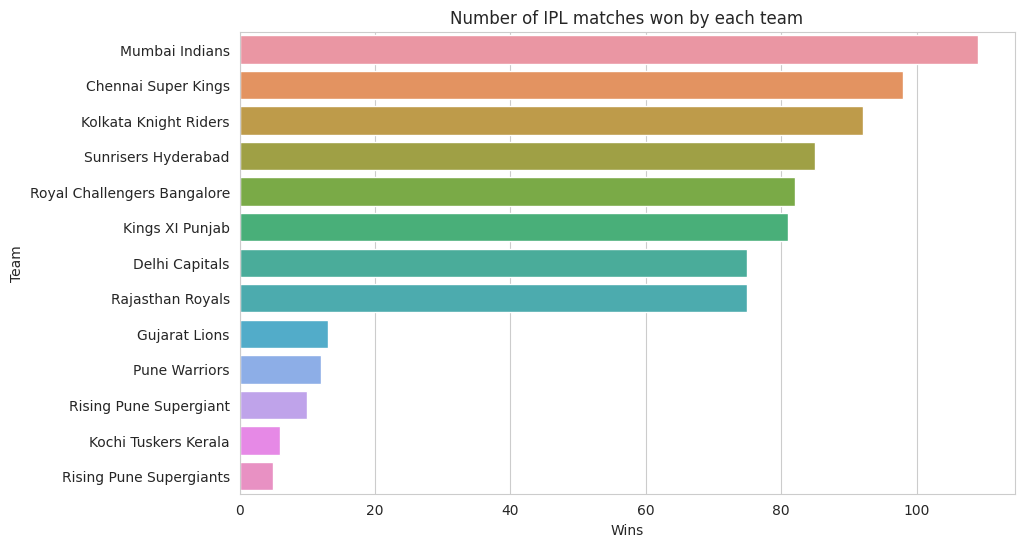

In [ ]:
#Number of IPL matches won by each team

plt.figure(figsize=(10,6))
sns.countplot(y='winner',data=data,order=data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of IPL matches won by each team')

Text(0.5, 1.0, 'Tosses Won')

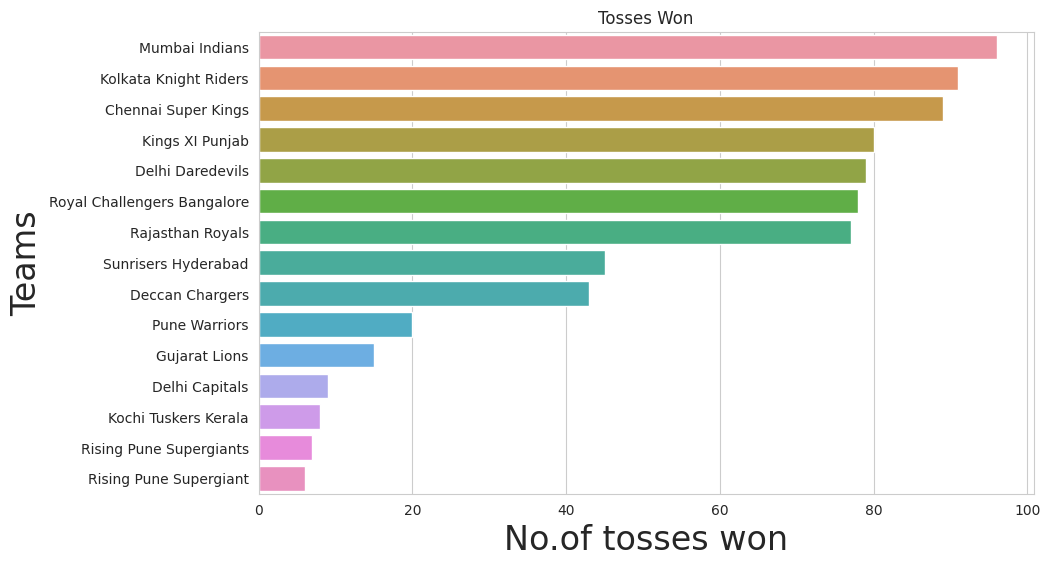

In [ ]:
#Number of toss won by each team

plt.figure(figsize=(10,6))
sns.countplot(y="toss_winner",data=data,order=data['toss_winner'].value_counts().index)
plt.xlabel("No.of tosses won",fontsize=24)
plt.ylabel("Teams",fontsize=24)
plt.title("Tosses Won")

Text(0.5, 1.0, 'Toss Decision')

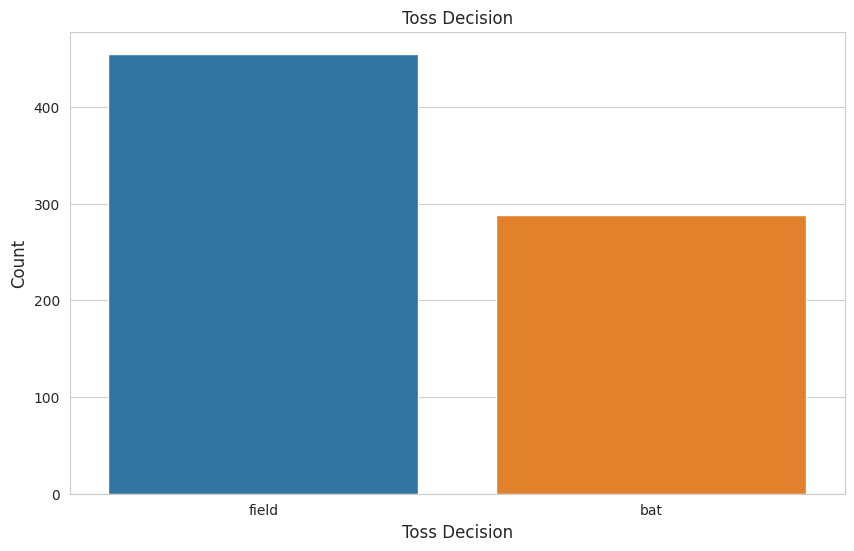

In [ ]:
#Decision taken by Toss wiining team

plt.figure(figsize=(10,6))
sns.countplot(x="toss_decision",data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

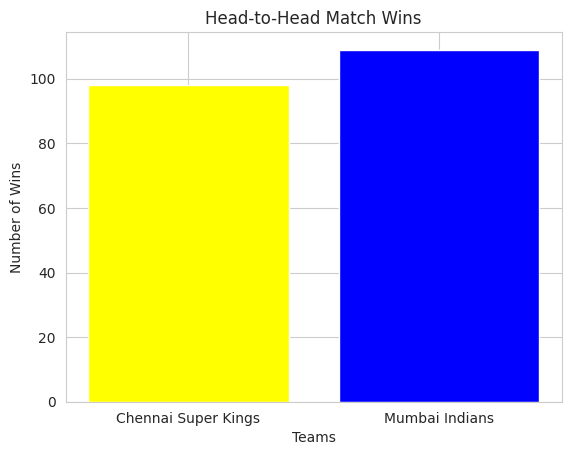

In [ ]:

# Define the two teams for comparison
team1 = 'Chennai Super Kings'
team2 = 'Mumbai Indians'

# Filter the dataset for matches involving the two teams
team1_matches = data[(data['team1'] == team1) | (data['team2'] == team1)]
team2_matches = data[(data['team1'] == team2) | (data['team2'] == team2)]

# Count the number of match wins for each team
team1_wins = team1_matches[team1_matches['winner'] == team1].shape[0]
team2_wins = team2_matches[team2_matches['winner'] == team2].shape[0]

# Plotting the data
teams = [team1, team2]
wins = [team1_wins, team2_wins]

colors = ['yellow', 'blue']

plt.bar(teams, wins, color=colors)
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Head-to-Head Match Wins')

# Displaying the chart
plt.show()


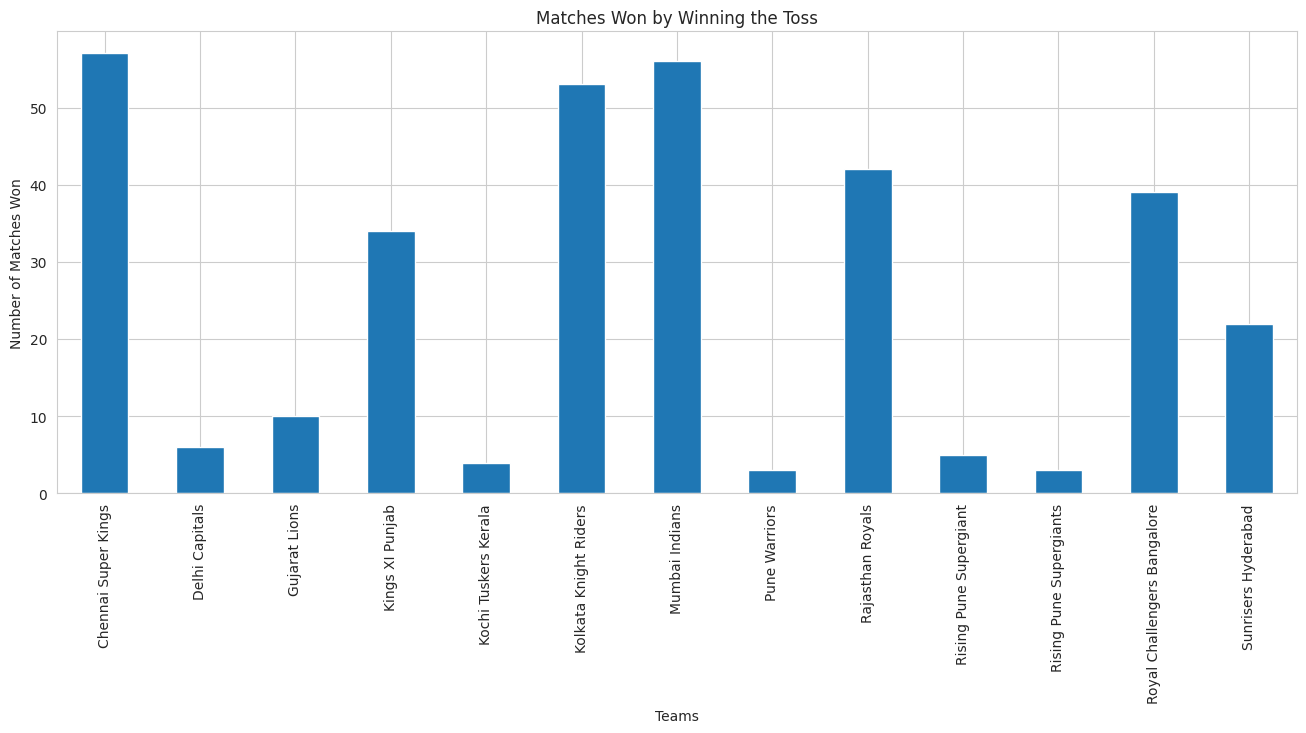

In [ ]:
# Grouping the data by toss_winner and winner columns and counting the number of matches won by winning the toss
matches_won_by_winning_toss = data[data["toss_winner"] == data["winner"]].groupby("toss_winner").size()

# Creating a bar plot
matches_won_by_winning_toss.plot(kind="bar", figsize=(16, 6))
plt.title("Matches Won by Winning the Toss")
plt.xlabel("Teams")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=90)

plt.show()

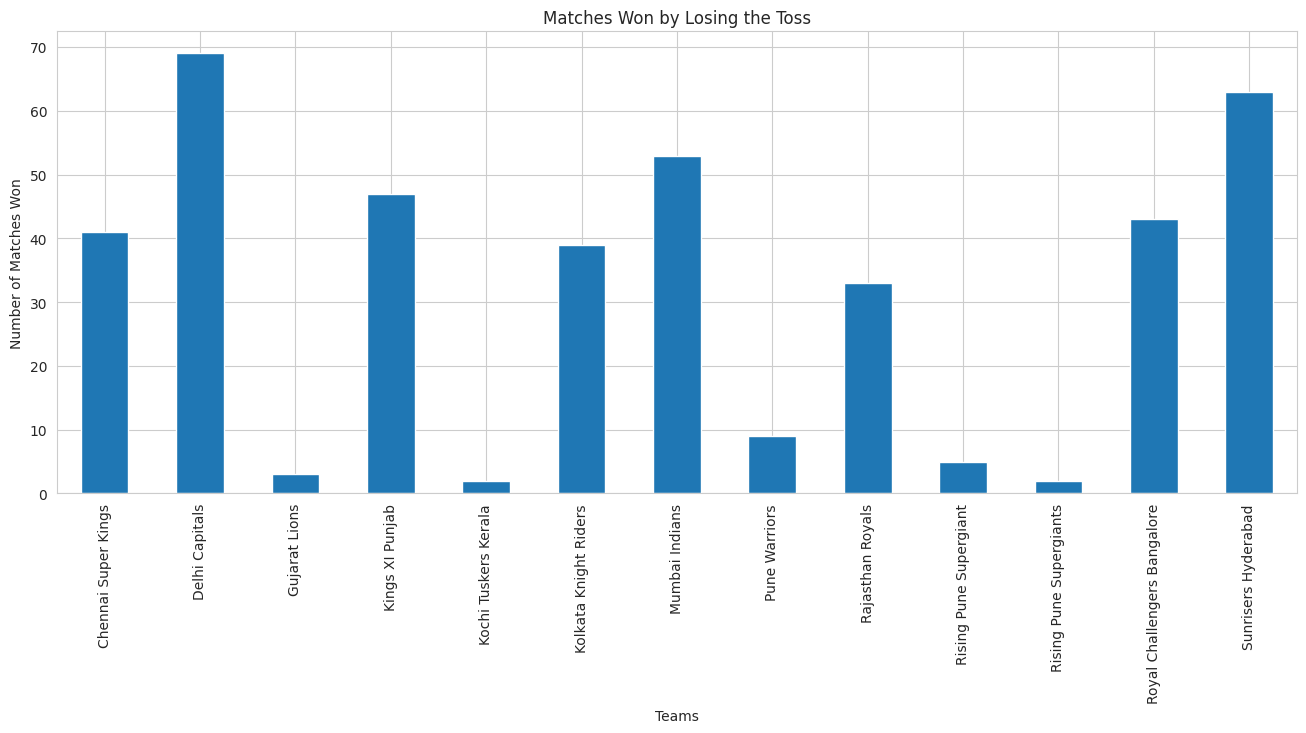

In [ ]:
# Grouping the data by toss_winner and winner columns and counting the number of matches won despite losing the toss
matches_won_by_losing_toss = data[data["toss_winner"] != data["winner"]].groupby("winner").size()

# Creating a bar plot
matches_won_by_losing_toss.plot(kind="bar", figsize=(16, 6))
plt.title("Matches Won Despite Losing the Toss")
plt.xlabel("Teams")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=90)

plt.show()

In [ ]:
data.drop(["id","Season","city","date","player_of_match","umpire1","umpire2","venue"],axis=1,inplace=True)

In [ ]:
data

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9
...,...,...,...,...,...,...,...,...,...
750,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6


***Splitting input and output data(dependent & independent)***

In [ ]:
X=data.drop(["winner"],axis=1)
y=data["winner"]

***Setting dummy variables for training***

In [ ]:
X=pd.get_dummies(X,["team1","team2","toss_winner","toss_decision","result"],drop_first=True)

In [ ]:
X

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Pune Warriors,...,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_tie
0,0,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,7,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,10,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
751,0,0,9,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
752,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X.describe()

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Pune Warriors,...,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_tie
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,...,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,0.025572,13.460296,3.375505,0.102288,0.018843,0.122476,0.009421,0.110363,0.133244,0.026918,...,0.122476,0.129206,0.026918,0.103634,0.008075,0.009421,0.104980,0.060565,0.612382,0.012113
std,0.157961,23.626205,3.393397,0.303231,0.136060,0.328056,0.096670,0.313553,0.340067,0.161953,...,0.328056,0.335654,0.161953,0.304990,0.089560,0.096670,0.306734,0.238692,0.487535,0.109464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,19.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,146.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***Converting categorical values into numericals***

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([12,  9,  5,  3, 12,  6,  3,  1,  6,  5,  6,  2,  5,  1,  6,  9,  5,
       12, 11, 12,  6,  2,  6,  9,  3,  5,  9,  5,  2,  5, 12,  9,  6,  3,
       12,  6,  9,  1,  9,  1,  3,  9,  6,  5,  2, 12,  3,  1,  3,  1, 12,
        6,  9, 11,  9,  5,  6,  6,  5,  0,  1, 11,  5,  8,  1,  0,  8,  3,
        8,  0, 12,  3,  0,  6,  1,  3,  8,  1, 11,  3,  6,  8,  3, 12,  6,
        0,  5,  8,  6,  0,  5,  8,  3,  5,  6,  3,  1,  6,  3,  8,  6,  0,
        1,  8,  3, 11,  3,  1,  8, 11,  5,  8,  0,  8,  0,  8,  6, 11,  1,
       12,  0,  5, 12,  1,  8,  3, 12,  1,  3, 12,  6,  8, 11,  3,  1,  0,
        6, 11,  8,  0,  3, 11,  0,  8,  1, 12,  8,  0,  1,  3,  0,  6,  1,
       12, 11,  6,  1, 11,  8,  3,  0, 12,  3,  1,  5, 11,  5,  0,  1, 11,
       12, 11, 12,  5,  6,  1,  5, 12,  1, 11,  0,  6, 11,  0, 12,  8, 11,
       12,  3,  6, 11,  8,  6,  8,  5,  1,  8,  6,  1,  6,  0,  1,  5, 11,
        0,  6,  3,  1,  8,  0,  8,  5, 12,  3, 12, 11,  3,  6, 12,  6,  0,
       11,  1, 12,  6,  5

***Splitting the data for training and testing***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(594, 43)

In [ ]:
X_test.shape

(149, 43)

In [ ]:
y_train.shape

(594,)

In [ ]:
y_test.shape

(149,)

***Model Creation and Evaluation***

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


***Logistic Regression***

In [ ]:
#creating the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#accuracy on training data
lr_y_train_prediction=lr.predict(X_train)
lr_training_data_accuracy=accuracy_score(lr_y_train_prediction,y_train)
print("Accuracy on training data:",lr_training_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for training data:\n",confusion_matrix(y_train,lr_y_train_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(lr_y_train_prediction,y_train))
print("--------------------------------------------------------------------------------------------------------------------------------------")


Accuracy on training data: 0.5622895622895623
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for training data:
 [[19  8  0  9  0  6  7  0  9  0  0  9 10]
 [ 2 34  0  3  0  5  5  0  5  0  0  3  4]
 [ 1  1  7  0  0  0  1  0  0  0  0  0  0]
 [ 0  4  0 38  0  7  5  0  3  0  0  5  3]
 [ 1  0  0  0  0  2  1  0  0  0  0  0  0]
 [ 0  3  0  5  0 56  2  0  4  0  0  3  4]
 [ 0  7  0  3  0  5 52  0  3  0  0  5  5]
 [ 3  1  0  1  0  1  1  0  1  0  0  0  1]
 [ 0  5  0  6  0  4  3  0 39  0  0  3  2]
 [ 1  0  0  1  0  1  2  0  0  0  0  2  2]
 [ 1  0  0  1  0  0  1  0  0  0  0  0  1]
 [ 0  4  0  4  0  1  6  0  1  0  0 47  6]
 [ 2  3  0  7  0  4  3  0  3  0  0  3 42]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#accuracy on test data
lr_y_test_prediction=lr.predict(X_test)
lr_test_data_accuracy=accuracy_score(lr_y_test_prediction,y_test)
print("Accuracy on test data:",lr_test_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for test data:\n",confusion_matrix(y_test,lr_y_test_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n|",classification_report(lr_y_test_prediction,y_test))
print("--------------------------------------------------------------------------------------------------------------------------------------")


Accuracy on test data: 0.44966442953020136
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for test data:
 [[ 3  1  0  2  0  3  3  0  2  0  0  5  2]
 [ 1  7  0  1  0  0  3  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  2  0]
 [ 0  2  0  7  0  0  4  0  2  0  0  0  1]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  1  0 10  1  0  0  0  0  0  1]
 [ 0  2  0  3  0  2 16  0  2  0  0  1  3]
 [ 0  1  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  1  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  0  1  0  0  1  0  0  7  1]
 [ 0  1  0  2  0  3  2  0  2  0  0  2  6]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
|               precision    recall  f1-score   support

           0       0.14    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Random Forest Classifier***

In [ ]:
#creating the model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#accuracy on training data
rfc_y_train_prediction=classifier.predict(X_train)
rfc_training_data_accuracy=accuracy_score(rfc_y_train_prediction,y_train)
print("Accuracy on training data:",rfc_training_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for training data:\n",confusion_matrix(y_train,rfc_y_train_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_train_prediction,y_train))
print("--------------------------------------------------------------------------------------------------------------------------------------")



Accuracy on training data: 1.0
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for training data:
 [[77  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 65  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 67]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00   

In [ ]:
#accuracy on test data
rfc_y_test_prediction=classifier.predict(X_test)
rfc_test_data_accuracy=accuracy_score(rfc_y_test_prediction,y_test)
print("Accuracy on test data:",rfc_test_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for test data:\n",confusion_matrix(y_test,rfc_y_test_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_test_prediction,y_test))
print("--------------------------------------------------------------------------------------------------------------------------------------")

Accuracy on test data: 0.8859060402684564
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for test data:
 [[19  0  0  1  0  0  0  0  0  0  0  1  0]
 [ 2 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 14  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 28  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  1  0  1  0  0  0  0  0 11  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  1 15]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Support Vector Mahine/classifier(SVM/SVC)***

In [ ]:
#creating the model
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
#accuracy on training data
svc_y_train_prediction=svc.predict(X_train)
svc_training_data_accuracy=accuracy_score(svc_y_train_prediction,y_train)
print("Accuracy on training data:",svc_training_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for training data:\n",confusion_matrix(y_train,svc_y_train_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(svc_y_train_prediction,y_train))
print("--------------------------------------------------------------------------------------------------------------------------------------")


Accuracy on training data: 0.15993265993265993
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for training data:
 [[11  0  0  0  0 58  4  0  0  0  0  0  4]
 [ 2  0  0  0  0 53  3  0  0  0  0  0  3]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 8  0  0  0  0 50  4  0  0  0  0  0  3]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  1]
 [ 7  0  0  0  0 63  3  0  0  0  0  1  3]
 [ 7  0  0  0  0 58  9  0  0  0  0  0  6]
 [ 3  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 5  0  0  0  0 51  3  0  0  0  0  0  3]
 [ 0  0  0  0  0  7  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 8  0  0  0  0 50  3  0  0  0  0  3  5]
 [ 5  0  0  0  0 50  3  0  0  0  0  0  9]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#accuracy on test data
svc_y_test_prediction=svc.predict(X_test)
svc_test_data_accuracy=accuracy_score(svc_y_test_prediction,y_test)
print("Accuracy on test data:",svc_test_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for test data:\n",confusion_matrix(y_test,svc_y_test_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(svc_y_test_prediction,y_test))
print("--------------------------------------------------------------------------------------------------------------------------------------")

Accuracy on test data: 0.15436241610738255
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for test data:
 [[ 6  0  0  0  0 11  2  0  0  0  0  0  2]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 2  0  0  0  0 12  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 13  0  0  0  0  0  0  1]
 [ 4  0  0  0  0 22  1  0  0  0  0  1  1]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  3  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 10  2  0  0  0  0  0  3]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.29     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Decision Tree Classifier***

In [ ]:
#creating the model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
#accuracy on training data
dtree_y_train_prediction=svc.predict(X_train)
dtree_training_data_accuracy=accuracy_score(dtree_y_train_prediction,y_train)
print("Accuracy on training data:",dtree_training_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for training data:\n",confusion_matrix(y_train,dtree_y_train_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(dtree_y_train_prediction,y_train))
print("--------------------------------------------------------------------------------------------------------------------------------------")

Accuracy on training data: 0.15993265993265993
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for training data:
 [[11  0  0  0  0 58  4  0  0  0  0  0  4]
 [ 2  0  0  0  0 53  3  0  0  0  0  0  3]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 8  0  0  0  0 50  4  0  0  0  0  0  3]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  1]
 [ 7  0  0  0  0 63  3  0  0  0  0  1  3]
 [ 7  0  0  0  0 58  9  0  0  0  0  0  6]
 [ 3  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 5  0  0  0  0 51  3  0  0  0  0  0  3]
 [ 0  0  0  0  0  7  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 8  0  0  0  0 50  3  0  0  0  0  3  5]
 [ 5  0  0  0  0 50  3  0  0  0  0  0  9]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#accuracy on test data
dtree_y_test_prediction=svc.predict(X_test)
dtree_test_data_accuracy=accuracy_score(dtree_y_test_prediction,y_test)
print("Accuracy on test data:",dtree_test_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for test data:\n",confusion_matrix(y_test,dtree_y_test_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(dtree_y_test_prediction,y_test))
print("--------------------------------------------------------------------------------------------------------------------------------------")

Accuracy on test data: 0.15436241610738255
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for test data:
 [[ 6  0  0  0  0 11  2  0  0  0  0  0  2]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 2  0  0  0  0 12  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 13  0  0  0  0  0  0  1]
 [ 4  0  0  0  0 22  1  0  0  0  0  1  1]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  3  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 10  2  0  0  0  0  0  3]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.29     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***K Nearest Neighbour***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#accuracy on training data
knn_y_train_prediction=knn.predict(X_train)
knn_training_data_accuracy=accuracy_score(knn_y_train_prediction,y_train)
print("Accuracy on training data:",knn_training_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for training data:\n",confusion_matrix(y_train,knn_y_train_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(knn_y_train_prediction,y_train))
print("--------------------------------------------------------------------------------------------------------------------------------------")


Accuracy on training data: 0.7457912457912458
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for training data:
 [[68  2  0  0  0  1  3  0  1  0  0  1  1]
 [11 42  0  2  0  2  3  0  0  0  0  0  1]
 [ 2  1  7  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0 50  0  2  2  0  0  0  0  2  1]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  1  0  0  0 59  1  0  0  0  0  1  2]
 [12  1  0  0  0  0 67  0  0  0  0  0  0]
 [ 6  0  0  0  0  1  0  1  0  0  0  1  0]
 [10  1  0  4  0  1  5  0 40  0  0  0  1]
 [ 3  1  0  1  0  0  1  0  0  3  0  0  0]
 [ 2  1  0  0  0  0  1  0  0  0  0  0  0]
 [10  0  0  2  0  0  3  0  1  0  0 52  1]
 [10  1  0  0  0  0  0  0  1  0  0  1 54]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#accuracy on test data
knn_y_test_prediction=knn.predict(X_test)
knn_test_data_accuracy=accuracy_score(knn_y_test_prediction,y_test)
print("Accuracy on test data:",knn_test_data_accuracy)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for test data:\n",confusion_matrix(y_test,knn_y_test_prediction))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(knn_y_test_prediction,y_test))
print("--------------------------------------------------------------------------------------------------------------------------------------")


Accuracy on test data: 0.5369127516778524
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for test data:
 [[16  1  0  1  0  0  0  0  1  0  0  0  2]
 [ 4  7  0  1  0  0  1  0  0  0  0  1  0]
 [ 2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  0  9  0  2  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0 11  0  0  0  0  0  1  0]
 [ 7  0  0  4  0  2 14  0  0  0  0  1  1]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  1  0  0  0  0  1  0  6  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 2  0  0  0  0  1  0  0  0  0  0  8  2]
 [ 4  2  0  0  0  2  1  0  0  0  0  1  8]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.76      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Performance Evaluation***

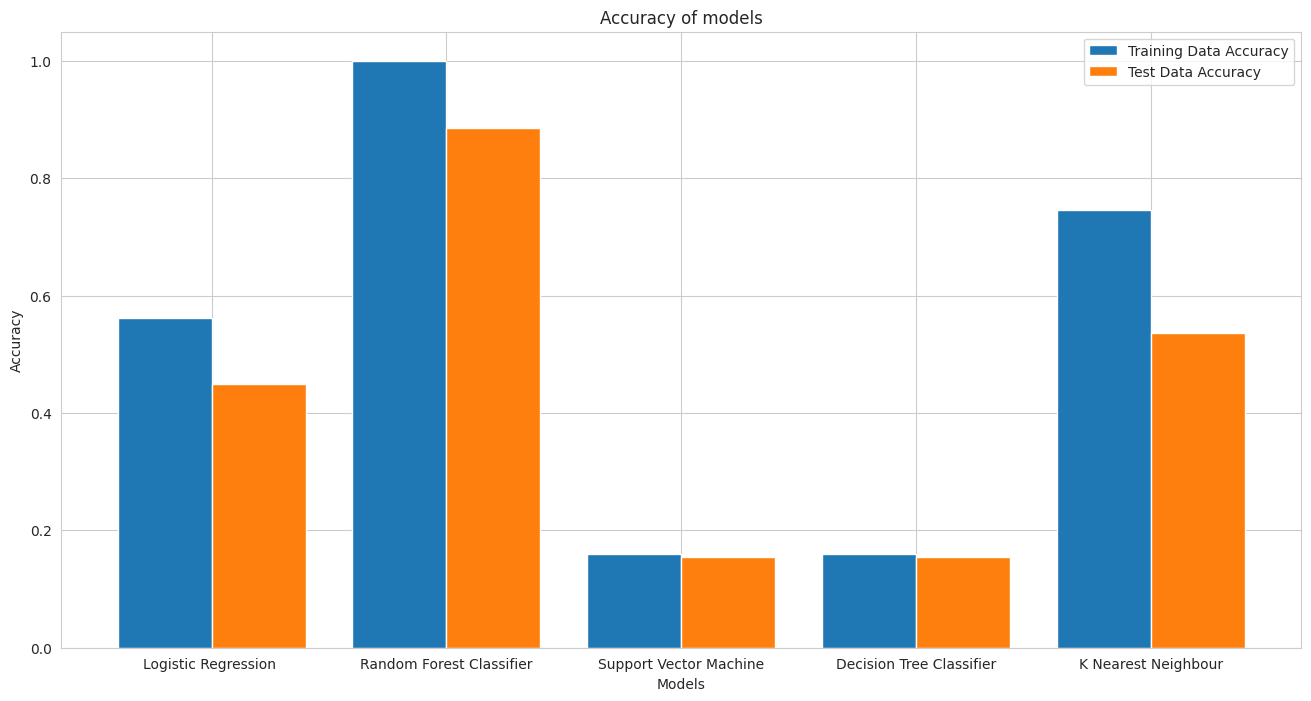

In [ ]:
Graph_X = ['Logistic Regression ','Random Forest Classifier','Support Vector Machine','Decision Tree Classifier','K Nearest Neighbour']
Graph_Y_train = [lr_training_data_accuracy,rfc_training_data_accuracy,svc_training_data_accuracy,dtree_training_data_accuracy,knn_training_data_accuracy]
Graph_Y_test = [lr_test_data_accuracy,rfc_test_data_accuracy,svc_test_data_accuracy,dtree_test_data_accuracy,knn_test_data_accuracy]

X_axis = np.arange(len(Graph_X))
plt.figure(figsize=(16,8))
plt.bar(X_axis - 0.2, Graph_Y_train, 0.4, label = 'Training Data Accuracy')
plt.bar(X_axis + 0.2, Graph_Y_test, 0.4, label = 'Test Data Accuracy')

plt.xticks(X_axis, Graph_X)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of models")
plt.legend()
plt.show()

***Selecting And Fine-tuning the model***

***Random Forest Classifier with 20 estimators ***

In [ ]:
#rfc with 20 estimators
classifier_20e=RandomForestClassifier(n_estimators=20)
classifier_20e.fit(X_train,y_train)
#accuracy on training data
rfc_y_train_prediction_20e=classifier_20e.predict(X_train)
rfc_training_data_accuracy_20e=accuracy_score(rfc_y_train_prediction_20e,y_train)
print("Accuracy on training data:",rfc_training_data_accuracy_20e)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for training data:\n",confusion_matrix(y_train,rfc_y_train_prediction_20e))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_train_prediction_20e,y_train))
print("--------------------------------------------------------------------------------------------------------------------------------------")

#accuracy on test data
rfc_y_test_prediction_20e=classifier_20e.predict(X_test)
rfc_test_data_accuracy_20e=accuracy_score(rfc_y_test_prediction_20e,y_test)
print("Accuracy on test data:",rfc_test_data_accuracy_20e)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for test data:\n",confusion_matrix(y_test,rfc_y_test_prediction_20e))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_test_prediction_20e,y_test))
print("--------------------------------------------------------------------------------------------------------------------------------------")

Accuracy on training data: 0.9983164983164983
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for training data:
 [[77  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 65  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 67]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Random Forest Classifier with 50 estimators***

In [ ]:
#rfc with 20 estimators
classifier_50e=RandomForestClassifier(n_estimators=50)
classifier_50e.fit(X_train,y_train)
#accuracy on training data
rfc_y_train_prediction_50e=classifier_50e.predict(X_train)
rfc_training_data_accuracy_50e=accuracy_score(rfc_y_train_prediction_50e,y_train)
print("Accuracy on training data:",rfc_training_data_accuracy_50e)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for training data:\n",confusion_matrix(y_train,rfc_y_train_prediction_50e))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_train_prediction_50e,y_train))
print("--------------------------------------------------------------------------------------------------------------------------------------")

#accuracy on test data
rfc_y_test_prediction_50e=classifier_50e.predict(X_test)
rfc_test_data_accuracy_50e=accuracy_score(rfc_y_test_prediction_50e,y_test)
print("Accuracy on test data:",rfc_test_data_accuracy_50e)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for test data:\n",confusion_matrix(y_test,rfc_y_test_prediction_50e))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_test_prediction_50e,y_test))
print("--------------------------------------------------------------------------------------------------------------------------------------")

Accuracy on training data: 1.0
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for training data:
 [[77  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 65  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 67]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Random Forest Classifier with 100 estimators***

In [ ]:
#rfc with 100 estimators
classifier_100e=RandomForestClassifier(n_estimators=100)
classifier_100e.fit(X_train,y_train)
#accuracy on training data
rfc_y_train_prediction_100e=classifier_100e.predict(X_train)
rfc_training_data_accuracy_100e=accuracy_score(rfc_y_train_prediction_100e,y_train)
print("Accuracy on training data:",rfc_training_data_accuracy_100e)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for training data:\n",confusion_matrix(y_train,rfc_y_train_prediction_100e))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_train_prediction_100e,y_train))
print("--------------------------------------------------------------------------------------------------------------------------------------")

#accuracy on test data
rfc_y_test_prediction_100e=classifier_100e.predict(X_test)
rfc_test_data_accuracy_100e=accuracy_score(rfc_y_test_prediction_100e,y_test)
print("Accuracy on test data:",rfc_test_data_accuracy_100e)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for test data:\n",confusion_matrix(y_test,rfc_y_test_prediction_100e))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_test_prediction_100e,y_test))
print("--------------------------------------------------------------------------------------------------------------------------------------")

Accuracy on training data: 1.0
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for training data:
 [[77  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 65  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 67]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Random Forest Classifier with 200 estimators***

In [ ]:
#rfc with 200 estimators
classifier_200e=RandomForestClassifier(n_estimators=200)
classifier_200e.fit(X_train,y_train)
#accuracy on training data
rfc_y_train_prediction_200e=classifier_200e.predict(X_train)
rfc_training_data_accuracy_200e=accuracy_score(rfc_y_train_prediction_200e,y_train)
print("Accuracy on training data:",rfc_training_data_accuracy_200e)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for training data:\n",confusion_matrix(y_train,rfc_y_train_prediction_200e))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_train_prediction_200e,y_train))
print("--------------------------------------------------------------------------------------------------------------------------------------")

#accuracy on test data
rfc_y_test_prediction_200e=classifier_200e.predict(X_test)
rfc_test_data_accuracy_200e=accuracy_score(rfc_y_test_prediction_200e,y_test)
print("Accuracy on test data:",rfc_test_data_accuracy_200e)
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Confusion Matrix for test data:\n",confusion_matrix(y_test,rfc_y_test_prediction_200e))
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("Classification Report:\n",classification_report(rfc_y_test_prediction_200e,y_test))
print("--------------------------------------------------------------------------------------------------------------------------------------")

Accuracy on training data: 1.0
--------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix for training data:
 [[77  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 65  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 67]]
--------------------------------------------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Comparing the Random Forest Classifiers***

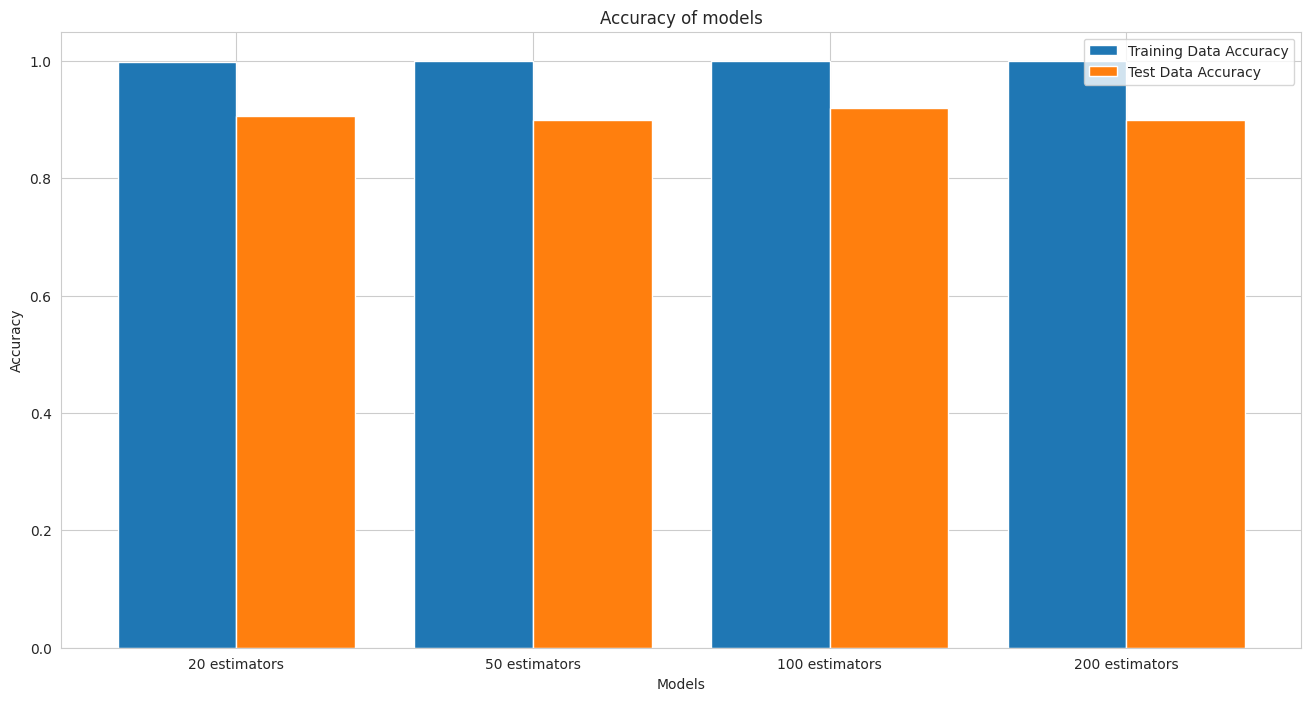

In [ ]:
rfc_Graph_X = ['20 estimators','50 estimators','100 estimators','200 estimators']
rfc_Graph_Y_train = [rfc_training_data_accuracy_20e,rfc_training_data_accuracy_50e,rfc_training_data_accuracy_100e
                     ,rfc_training_data_accuracy_200e]
rfc_Graph_Y_test = [rfc_test_data_accuracy_20e,rfc_test_data_accuracy_50e,rfc_test_data_accuracy_100e,rfc_test_data_accuracy_200e]

rfc_X_axis = np.arange(len(rfc_Graph_X))
plt.figure(figsize=(16,8))
plt.bar(rfc_X_axis - 0.2, rfc_Graph_Y_train, 0.4, label = 'Training Data Accuracy')
plt.bar(rfc_X_axis + 0.2, rfc_Graph_Y_test, 0.4, label = 'Test Data Accuracy')

plt.xticks(rfc_X_axis, rfc_Graph_X)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of models")
plt.legend()
plt.show()